### Libaries

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.cluster import KMeans,AgglomerativeClustering,DBSCAN
from sklearn.metrics import silhouette_score,calinski_harabasz_score
from sklearn.preprocessing import MinMaxScaler
from scipy.cluster import hierarchy

### EDA

In [3]:
df = pd.read_excel('EastWestAirlines.xlsx',sheet_name='data')

In [4]:
df.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID#                3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award?             3999 non-null   int64
dtypes: int64(12)
memory usage: 375.0 KB


In [6]:
df.describe()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
count,3999.000000,3.999000e+03,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.00000,3999.000000,3999.000000,3999.00000,3999.000000
mean,2014.819455,7.360133e+04,144.114529,2.059515,1.014504,1.012253,17144.846212,11.60190,460.055764,1.373593,4118.55939,0.370343
std,1160.764358,1.007757e+05,773.663804,1.376919,0.147650,0.195241,24150.967826,9.60381,1400.209171,3.793172,2065.13454,0.482957
min,1.000000,0.000000e+00,0.000000,1.000000,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,2.00000,0.000000
25%,1010.500000,1.852750e+04,0.000000,1.000000,1.000000,1.000000,1250.000000,3.00000,0.000000,0.000000,2330.00000,0.000000
50%,2016.000000,4.309700e+04,0.000000,1.000000,1.000000,1.000000,7171.000000,12.00000,0.000000,0.000000,4096.00000,0.000000
75%,3020.500000,9.240400e+04,0.000000,3.000000,1.000000,1.000000,23800.500000,17.00000,311.000000,1.000000,5790.50000,1.000000
max,4021.000000,1.704838e+06,11148.000000,5.000000,3.000000,5.000000,263685.000000,86.00000,30817.000000,53.000000,8296.00000,1.000000


In [7]:
df.isna().sum()

ID#                  0
Balance              0
Qual_miles           0
cc1_miles            0
cc2_miles            0
cc3_miles            0
Bonus_miles          0
Bonus_trans          0
Flight_miles_12mo    0
Flight_trans_12      0
Days_since_enroll    0
Award?               0
dtype: int64

In [8]:
df = df.rename(columns={'ID#':'ID','Award?':'Award'})

In [9]:
scaler = MinMaxScaler()

In [10]:
dfc = df.drop(['ID'],axis=1)
df_scaled = pd.DataFrame(scaler.fit_transform(dfc),columns=dfc.columns)

In [11]:
df_scaled.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
0,0.016508,0.0,0.00,0.0,0.0,0.000660,0.011628,0.000000,0.000000,0.843742,0.0
1,0.011288,0.0,0.00,0.0,0.0,0.000815,0.023256,0.000000,0.000000,0.839884,0.0
2,0.024257,0.0,0.00,0.0,0.0,0.015636,0.046512,0.000000,0.000000,0.847842,0.0
3,0.008667,0.0,0.00,0.0,0.0,0.001896,0.011628,0.000000,0.000000,0.837955,0.0
4,0.057338,0.0,0.75,0.0,0.0,0.164211,0.302326,0.067398,0.075472,0.835905,1.0


<AxesSubplot:>

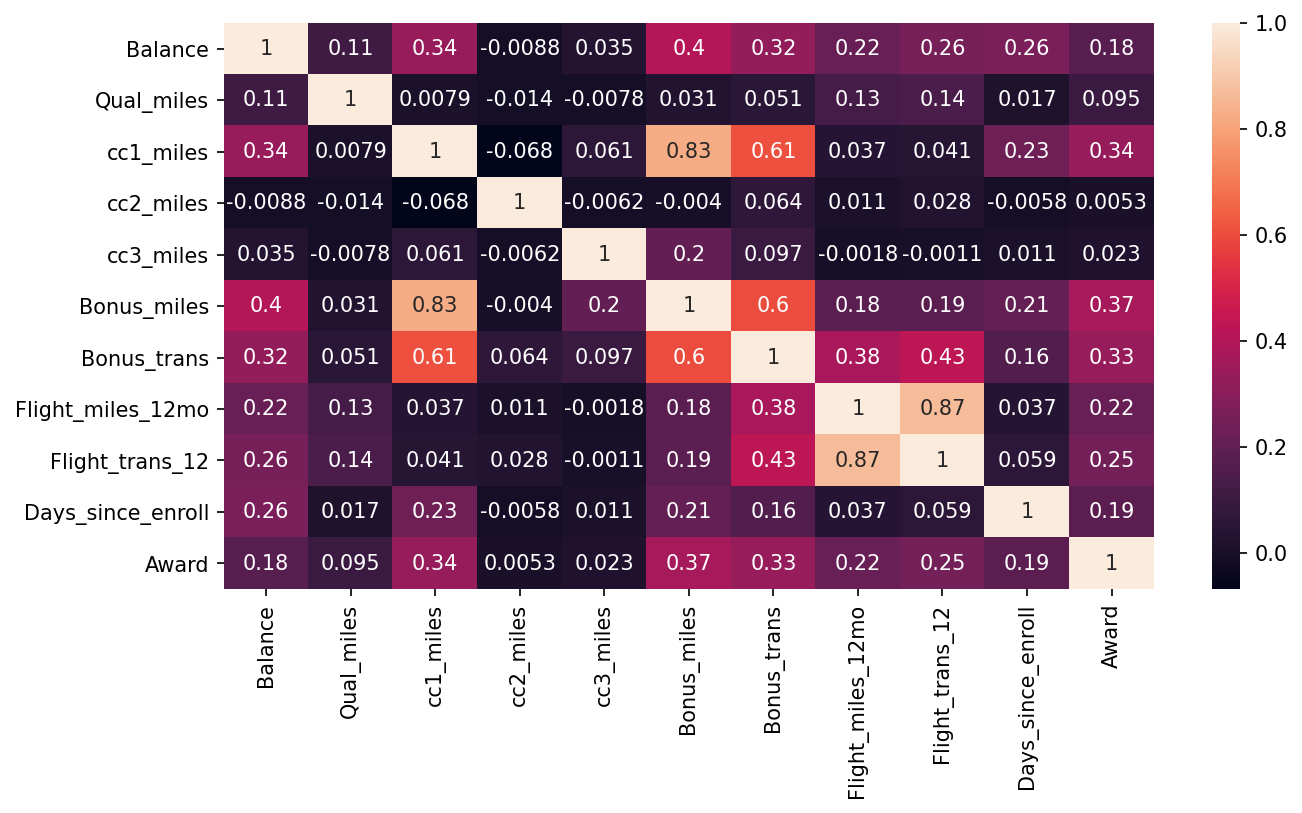

In [12]:
plt.figure(figsize=(10,5),dpi=150)
sns.heatmap(df_scaled.corr(),annot=True)

C:\Anaconda\lib\site-packages\seaborn\matrix.py:649: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


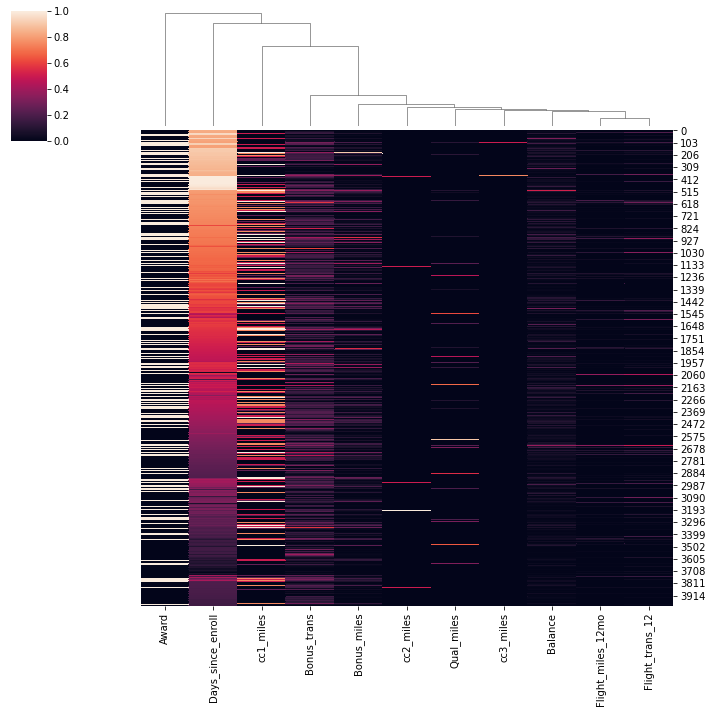

In [13]:
sns.clustermap(df_scaled,row_cluster=False)

## KMeans

In [14]:
ssd = []
silhuoette_scr = []
ch_scr = []

for n in range(2,20):
    Kms = KMeans(n_clusters=n)
    kms_Label = Kms.fit_predict(df_scaled)
    ssd.append(Kms.inertia_)
    silhuoette_scr.append(silhouette_score(df_scaled,kms_Label))
    ch_scr.append(calinski_harabasz_score(df_scaled,kms_Label))

Text(0.5, 1.0, 'Elbow Method')

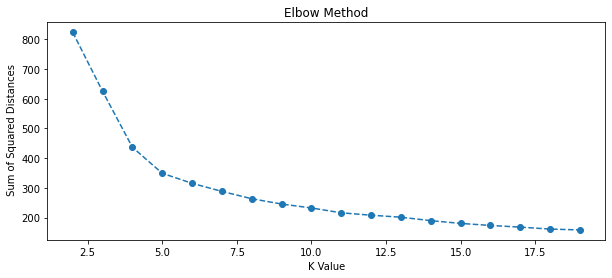

In [15]:
plt.figure(figsize=(10,4))
plt.plot(range(2,20), ssd,'o--')
plt.xlabel("K Value")
plt.ylabel(" Sum of Squared Distances")
plt.title("Elbow Method")

Text(0.5, 1.0, 'Silhuoette Score')

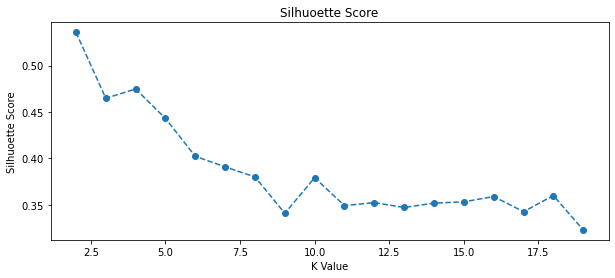

In [16]:
plt.figure(figsize=(10,4))
plt.plot(range(2,20),silhuoette_scr,'o--')
plt.xlabel('K Value')
plt.ylabel('Silhuoette Score')
plt.title('Silhuoette Score')

Text(0.5, 1.0, 'Calinski Harabasz score')

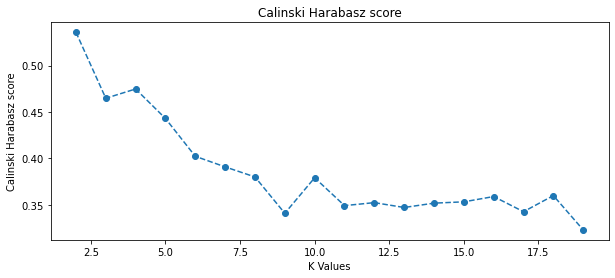

In [17]:
plt.figure(figsize=(10,4))
plt.plot(range(2,20),silhuoette_scr,'o--')
plt.xlabel('K Values')
plt.ylabel('Calinski Harabasz score')
plt.title('Calinski Harabasz score')

##### k = 4 seems to be the optimal value for our model.

### Final KMeans model

In [18]:
kms = KMeans(n_clusters=4)
kms_label = pd.DataFrame(kms.fit_predict(df_scaled))

In [19]:
df['Label_KMeans'] = kms_label

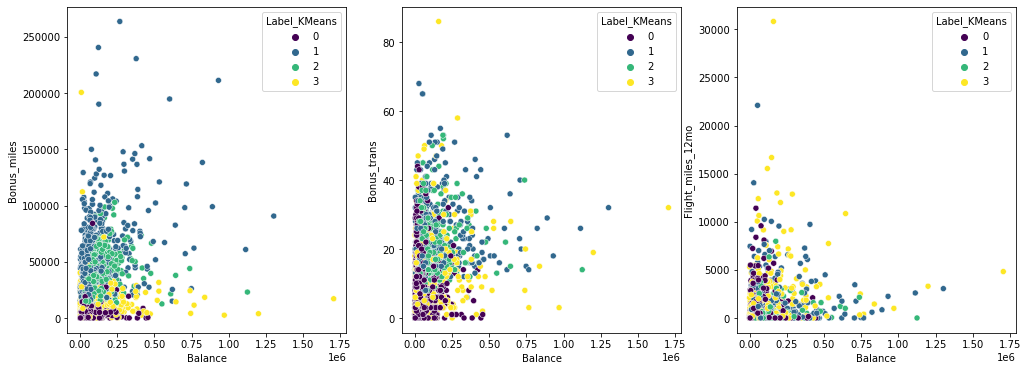

In [20]:
fig, (ax1, ax2,ax3) = plt.subplots(1,3, figsize=(17,6))
sns.scatterplot(data=df,x='Balance',y='Bonus_miles',hue='Label_KMeans',palette='viridis', ax=ax1)
sns.scatterplot(data=df,x='Balance',y='Bonus_trans',hue='Label_KMeans',palette='viridis',ax=ax2)
sns.scatterplot(data=df,x='Balance',y='Flight_miles_12mo',hue='Label_KMeans',palette='viridis',ax=ax3)
plt.show()

In [21]:
df.groupby('Label_KMeans',axis=0).mean()

,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
Label_KMeans,,,,,,,,,,,,
0,2284.375857,40747.617290,92.345809,1.092778,1.017923,1.004217,3335.152873,6.488666,226.599895,0.658935,3619.111755,0.0
1,1613.016089,108317.387376,198.336634,3.915842,1.001238,1.025990,45609.657178,20.201733,713.728960,2.142327,4863.439356,1.0
2,1833.460548,118032.061192,73.112721,3.576490,1.001610,1.022544,31282.666667,17.251208,225.352657,0.632850,4436.307568,0.0
3,1904.763744,83529.153046,290.453195,1.156018,1.032689,1.008915,8850.395245,10.476969,1030.112927,3.148588,4338.867756,1.0


##### Cluster 0 belongs to passengers with number of miles earned with freq-flyer credit card in the past 12 months.
##### Cluster 1 belongs to passengers with minimum number of miles eligible for award travel and least number of miles earned from non-flight bonus transactions in the past 12 months and number of non-flight bonus transactions in the past 12 months.
##### Cluster 2 belongs to passengers with amount of balance and least number of miles counted as qualifying for Topflight status.
##### Cluster 3 belongs to passengers with higest number of miles counted as qualifying for Topflight status.

## DBSCAN

In [22]:
per_outliers = []

for m in range(0,25):
    dbs = DBSCAN(min_samples=m)
    dbs.fit(df_scaled)
    outliers = 100 * np.sum(dbs.labels_ == -1) / len(dbs.labels_) 
    per_outliers.append(outliers)

Text(0.5, 0, 'Minimum Number of Samples')

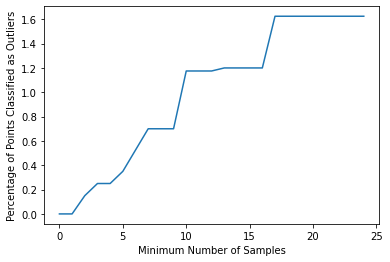

In [23]:
sns.lineplot(x=np.arange(0,25),y=per_outliers)
plt.ylabel("Percentage of Points Classified as Outliers")
plt.xlabel("Minimum Number of Samples")

In [24]:
outlier_percent = []
number_of_outliers = []

for eps in np.linspace(0.01,1,25):
    
    # Create Model
    dbscan = DBSCAN(eps=eps,min_samples=5)
    dbscan.fit(df_scaled)
    
    # Log Number of Outliers
    number_of_outliers.append(np.sum(dbscan.labels_ == -1))
    
    # Log percentage of points that are outliers
    perc_outliers = 100 * np.sum(dbscan.labels_ == -1) / len(dbscan.labels_)
    
    outlier_percent.append(perc_outliers)

Text(0.5, 0, 'Epsilon Value')

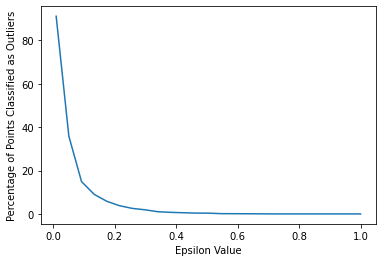

In [25]:
sns.lineplot(x=np.linspace(0.01,1,25),y=outlier_percent)
plt.ylabel("Percentage of Points Classified as Outliers")
plt.xlabel("Epsilon Value")

### Final model 

In [26]:
dbs = DBSCAN(eps=0.3,min_samples=15)
label_DBS = dbs.fit_predict(df_scaled)

In [27]:
label_DBS

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

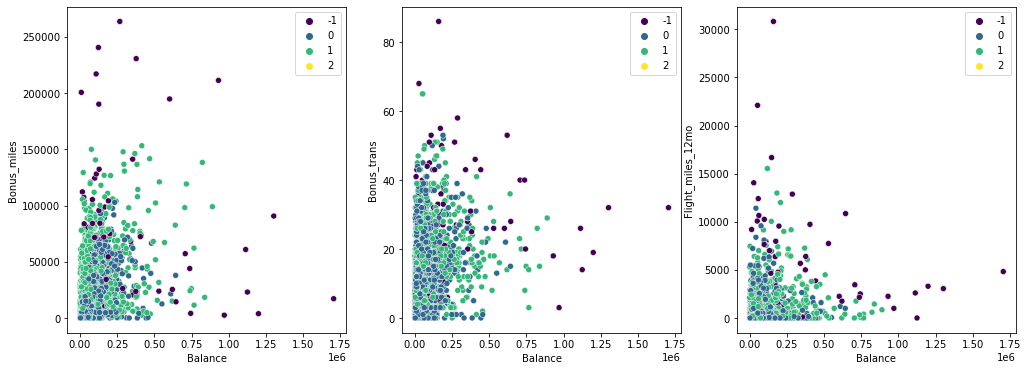

In [28]:
fig, (ax1, ax2,ax3) = plt.subplots(1,3, figsize=(17,6))
sns.scatterplot(data=df,x='Balance',y='Bonus_miles',hue=label_DBS,palette='viridis', ax=ax1)
sns.scatterplot(data=df,x='Balance',y='Bonus_trans',hue=label_DBS,palette='viridis',ax=ax2)
sns.scatterplot(data=df,x='Balance',y='Flight_miles_12mo',hue=label_DBS,palette='viridis',ax=ax3)
plt.show()

##### cluster indicated by -1 is for the outliers .

## Hierarchical Clustering

In [29]:
model_H = AgglomerativeClustering(n_clusters=4, affinity = 'euclidean',linkage='ward') 

In [30]:
cluster_labels = model_H.fit_predict(df_scaled)

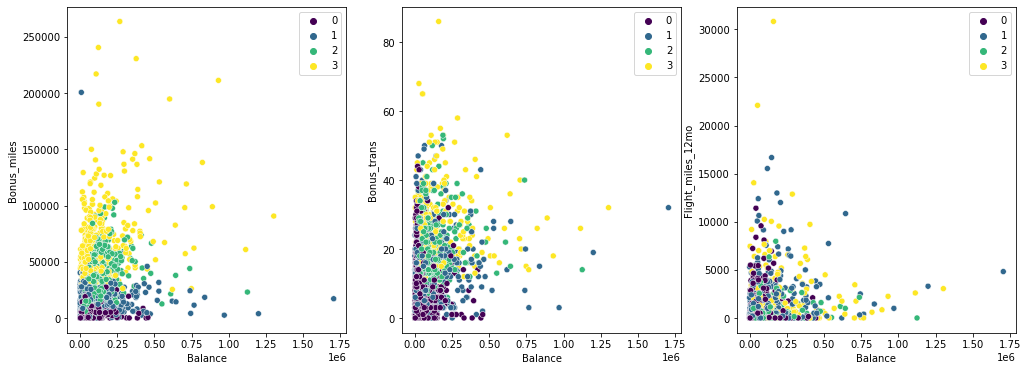

In [31]:
fig, (ax1, ax2,ax3) = plt.subplots(1,3, figsize=(17,6))
sns.scatterplot(data=df,x='Balance',y='Bonus_miles',hue=cluster_labels,palette='viridis', ax=ax1)
sns.scatterplot(data=df,x='Balance',y='Bonus_trans',hue=cluster_labels,palette='viridis',ax=ax2)
sns.scatterplot(data=df,x='Balance',y='Flight_miles_12mo',hue=cluster_labels,palette='viridis',ax=ax3)
plt.show()

In [32]:
linkage_matrix = hierarchy.linkage(model_H.children_)

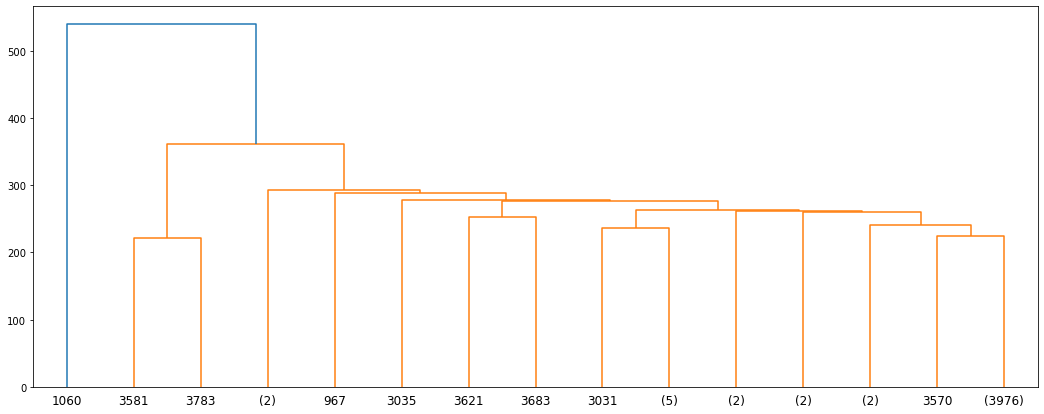

In [33]:
plt.figure(figsize=(18,7))
dn = hierarchy.dendrogram(linkage_matrix,truncate_mode='lastp',p=15)